# H1N1 and Seasonal Flu Vaccine Prediction - Classification Project


## Business Understanding
#### Problem Statement
Understanding the factors that influence individuals' decisions to get vaccinated is crucial for developing effective public health strategies, especially for future pandemic scenarios. 
This project aims to identify and analyze the demographic, behavioral, and attitudinal factors that predict whether individuals received the H1N1 vaccination during the 2009 pandemic.

#### Stakeholder
The primary stakeholder for this analysis is the Department of Health and Human Services (HHS), specifically their immunization campaign strategists. 

#### Business Objective
Develop a predictive model that can accurately identify individuals who are likely or unlikely to get vaccinated based on their demographic information, behaviors, and attitudes. 
##### For this project, we'll focus on predicting the H1N1 vaccine


#### Data Understanding


In [156]:
# import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
# Set visualization styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")



In [158]:
# Read the dataset
df = pd.read_csv('H1N1_Flu_vaccines.csv')

print(f"Dataset shape: {df.shape}")

Dataset shape: (26707, 38)


In [159]:
#Uncomment the following lines to load the dataset

# load the dataset
#train_features = pd.read_csv('H1N1_Flu_Vaccines.csv')
# train_labels = pd.read_csv('H1N1_Flu_Vaccines.csv')

# Merge the features and labels datasets
# df = pd.merge(train_features, train_labels, on='respondent_id')

# For this project, we'll focus on predicting the H1N1 vaccine
# We could also predict seasonal flu vaccine, but we're choosing H1N1 for now
# print(f"Dataset shape: {df.shape}")

In [160]:
#Lets check the structure of the dataset
print(f"Dataset Information: {df.info()}")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [161]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_data = pd.concat([missing_values, missing_percent], axis=1, keys=['Missing Values', 'Percentage'])
missing_values = missing_values[missing_values > 0]
print(f"Missing values in the dataset: {missing_values}")



Missing values in the dataset: h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
education                       1407
income_poverty                  4423
marital_status                  1408
rent_or_own                     2042
employment_status               1463
househo

In [162]:
# Check column names
print(f"Column names: {df.columns.tolist()}")

Column names: ['respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'household_adults', 'household_children', 'employment_industry', 'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine']


In [163]:
# Display summary statistics for numeric columns
print("\nSummary Statistics for Numeric Columns:")
df.describe()


Summary Statistics for Numeric Columns:


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000



H1N1 Vaccination Distribution:
h1n1_vaccine
0    21033
1     5674
Name: count, dtype: int64
Percentage vaccinated: 21.25%


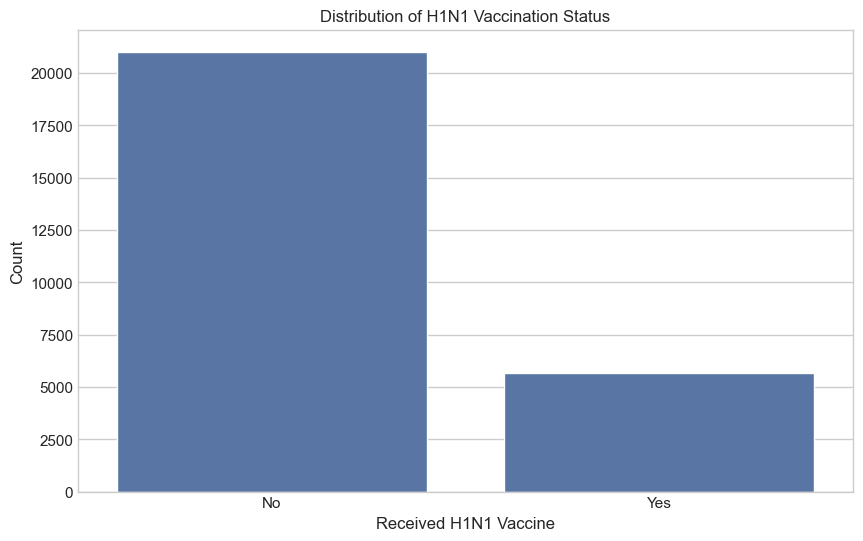

In [164]:
# Check the distribution of our target variable (H1N1 vaccination)
print("\nH1N1 Vaccination Distribution:")
h1n1_counts = df['h1n1_vaccine'].value_counts()
print(h1n1_counts)
print(f"Percentage vaccinated: {h1n1_counts[1] / len(df) * 100:.2f}%")

# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='h1n1_vaccine', data=df)
plt.title('Distribution of H1N1 Vaccination Status')
plt.xlabel('Received H1N1 Vaccine')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

#### Let's explore some of the key features and their relationship with our target:


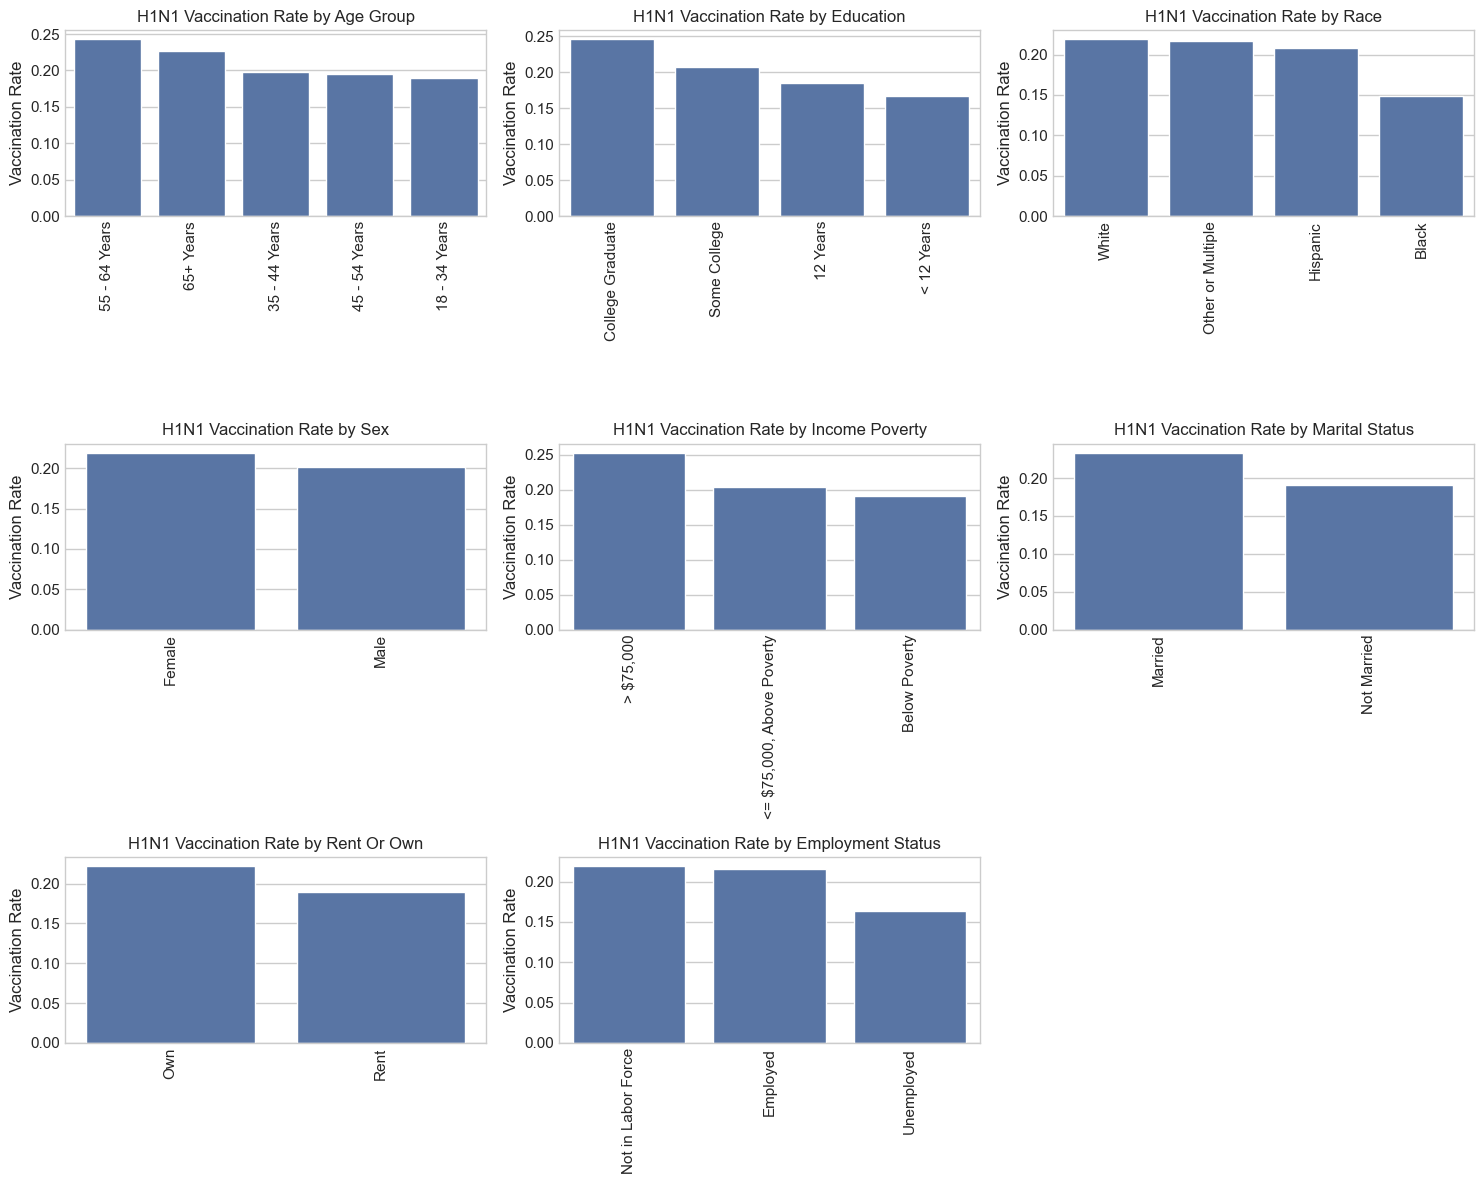

In [165]:
# Examine the relationship between demographic variables and vaccination status
demographic_vars = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status']

plt.figure(figsize=(15, 12))
for i, var in enumerate(demographic_vars, 1):
    plt.subplot(3, 3, i)
    
    # Calculate vaccination rates by category
    vax_by_category = df.groupby(var)['h1n1_vaccine'].mean().sort_values(ascending=False)
    
    # Plot
    sns.barplot(x=vax_by_category.index, y=vax_by_category.values)
    plt.title(f'H1N1 Vaccination Rate by {var.replace("_", " ").title()}')
    plt.xticks(rotation=90)
    plt.ylabel('Vaccination Rate')
    plt.xlabel('')
    plt.tight_layout()

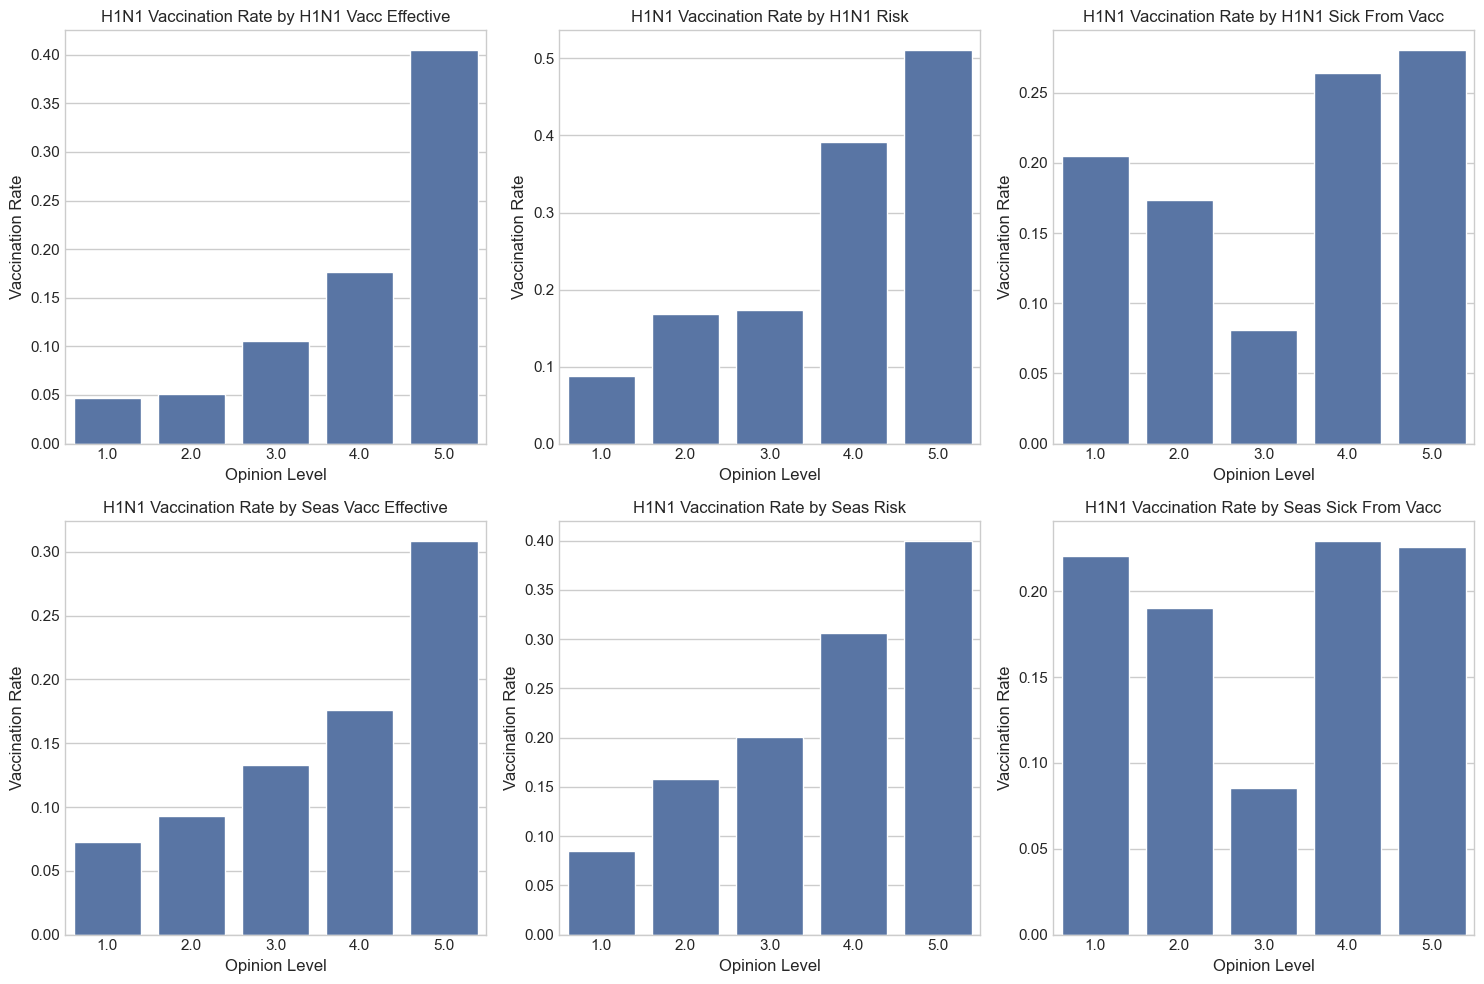

In [166]:

# Explore attitude and behavior variables

attitude_vars = ['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 
                'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc']

plt.figure(figsize=(15, 10))
for i, var in enumerate(attitude_vars, 1):
    plt.subplot(2, 3, i)
    
    # Calculate vaccination rates by opinion level
    vax_by_opinion = df.groupby(var)['h1n1_vaccine'].mean()
    
    # Plot
    sns.barplot(x=vax_by_opinion.index, y=vax_by_opinion.values)
    plt.title(f'H1N1 Vaccination Rate by {var.replace("opinion_", "").replace("_", " ").title()}')
    plt.ylabel('Vaccination Rate')
    plt.xlabel('Opinion Level')
    
plt.tight_layout()


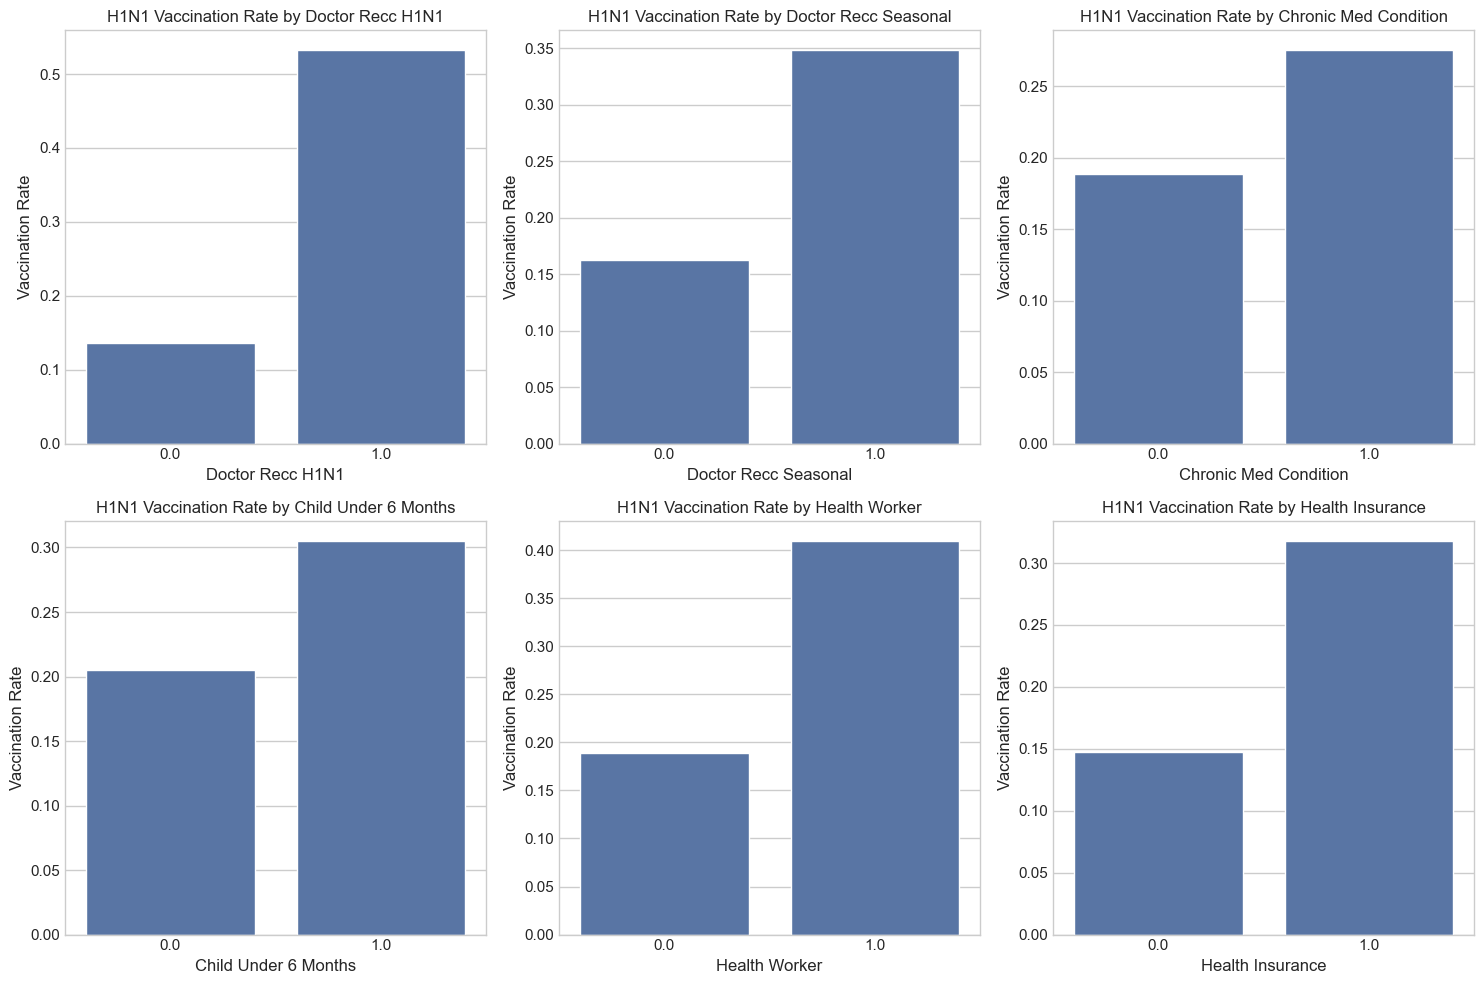

In [167]:
# Examine health behavior variables
behavior_vars = ['doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 
                'child_under_6_months', 'health_worker', 'health_insurance']

plt.figure(figsize=(15, 10))
for i, var in enumerate(behavior_vars, 1):
    plt.subplot(2, 3, i)
    
    # Calculate vaccination rates by behavior
    vax_by_behavior = df.groupby(var)['h1n1_vaccine'].mean()
    
    # Plot
    sns.barplot(x=vax_by_behavior.index, y=vax_by_behavior.values)
    plt.title(f'H1N1 Vaccination Rate by {var.replace("_", " ").title()}')
    plt.ylabel('Vaccination Rate')
    plt.xlabel(var.replace("_", " ").title())
    
plt.tight_layout()
plt.show()

#### Let's also check for correlations between variables:


In [168]:
# Convert categorical variables to numeric for correlation analysis
# This is a simplified approach - we'll do proper encoding in the modeling section
df_numeric = df.copy()
for col in df_numeric.select_dtypes(include=['object']).columns:
    df_numeric[col] = pd.factorize(df_numeric[col])[0]

# Calculate correlations with target
correlations = df_numeric.corr()['h1n1_vaccine'].sort_values(ascending=False)
print("\nTop 10 features correlated with H1N1 vaccination:")
print(correlations.head(11)) 


Top 10 features correlated with H1N1 vaccination:
h1n1_vaccine                   1.000000
doctor_recc_h1n1               0.393890
seasonal_vaccine               0.377143
opinion_h1n1_risk              0.323265
opinion_h1n1_vacc_effective    0.269347
opinion_seas_risk              0.258571
doctor_recc_seasonal           0.209864
opinion_seas_vacc_effective    0.179272
health_worker                  0.169768
h1n1_concern                   0.121929
health_insurance               0.121170
Name: h1n1_vaccine, dtype: float64


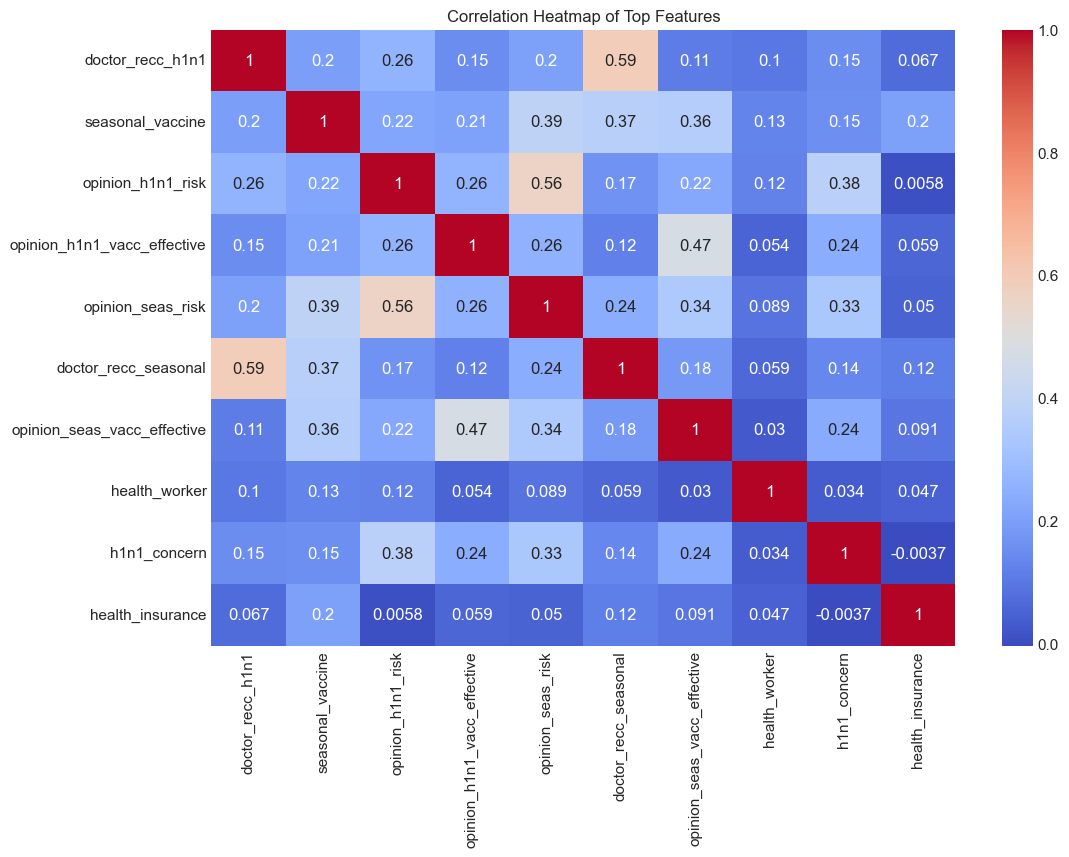

In [169]:
# Visualize top correlations
plt.figure(figsize=(12, 8))
top_corr_features = correlations.index[1:11]  # Exclude the target itself
sns.heatmap(df_numeric[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Top Features')
plt.show()

### Key Insights from Data Exploration
Based on our exploration, we can identify several key insights:

1. Target Distribution: The dataset has an imbalance in the target variable, with a minority of respondents receiving the H1N1 vaccine.
2. Key Predictors: Some of the strongest predictors appear to be: 
    - Opinion on vaccine effectiveness
    - Health-related behaviors and status
    - Demographic factors like age, education, and income
    - Doctor's recommendation


3. Missing Data: Several columns contain missing values that will need to be addressed through imputation or other techniques.
4. Feature Relationships: There are correlations between certain features that might affect model performance.



### Data Preparation
let's prepare our data for modeling:

In [170]:
# Separate features and target
X = df.drop(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y = df['h1n1_vaccine']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical features: {len(categorical_cols)}")
print(f"Numerical features: {len(numerical_cols)}")



Categorical features: 12
Numerical features: 23


In [171]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (21365, 35)
Testing set shape: (5342, 35)


In [172]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Create preprocessing pipelines
# For categorical features: impute missing values with most frequent value, then one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# For numerical features: impute missing values with median, then scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preview what the preprocessed data will look like
# This is just to understand the transformation, not necessary for the actual modeling
preprocessor_fit = preprocessor.fit(X_train)
X_train_preprocessed = preprocessor_fit.transform(X_train)

print(f"Shape of preprocessed training data: {X_train_preprocessed.shape}")

Shape of preprocessed training data: (21365, 105)


## Modeling
### Baseline Model: Logistic Regression
A simple logistic regression model is our baseline:

In [173]:
# Import necessary libraries for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')


In [174]:
# Create a pipeline with preprocessing and logistic regression
baseline_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Train the model
baseline_model.fit(X_train, y_train)

# Make predictions
y_train_pred = baseline_model.predict(X_train)
y_test_pred = baseline_model.predict(X_test)

# Get probabilities for ROC curve
y_train_proba = baseline_model.predict_proba(X_train)[:, 1]
y_test_proba = baseline_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Baseline Logistic Regression Model Performance:")
print("\nTraining Data:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_train, y_train_proba):.4f}")
print("\nTesting Data:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_proba):.4f}")



Baseline Logistic Regression Model Performance:

Training Data:
Accuracy: 0.8375
ROC-AUC: 0.8397

Testing Data:
Accuracy: 0.8368
ROC-AUC: 0.8288


In [175]:
# Display classification report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))


Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4207
           1       0.68      0.44      0.54      1135

    accuracy                           0.84      5342
   macro avg       0.77      0.69      0.72      5342
weighted avg       0.82      0.84      0.82      5342



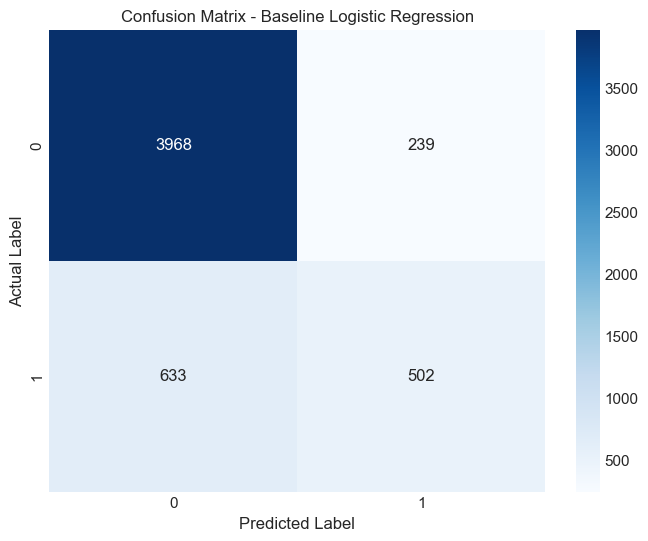

In [176]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Baseline Logistic Regression')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()



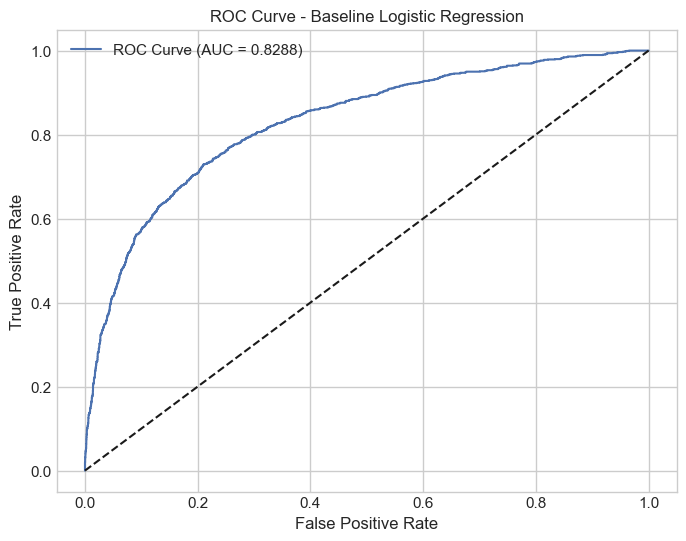

In [177]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_test_proba):.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Baseline Logistic Regression')
plt.legend()
plt.show()

### Examine more important features from our basline model

In [178]:
# Get feature names from the preprocessor
feature_names = []

# Get numerical feature names directly
feature_names.extend(numerical_cols)

# Get one-hot encoded feature names
ohe = preprocessor.named_transformers_['cat'].named_steps['encoder']
cat_feature_names = ohe.get_feature_names_out(categorical_cols)
feature_names.extend(cat_feature_names)

# Get coefficients from the logistic regression model
coefficients = baseline_model.named_steps['classifier'].coef_[0]

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute coefficient value
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

# Display top 15 most important features
print("\nTop 15 Most Important Features:")
print(feature_importance.head(15))



Top 15 Most Important Features:
                           Feature  Coefficient  Abs_Coefficient
66    employment_industry_haxffmxo     1.113325         1.113325
85  employment_occupation_dcjcmpih     1.113325         1.113325
9                 doctor_recc_h1n1     0.782170         0.782170
15     opinion_h1n1_vacc_effective     0.634469         0.634469
97  employment_occupation_tfqavkke    -0.514493         0.514493
16               opinion_h1n1_risk     0.480500         0.480500
86  employment_occupation_dlvbwzss     0.409722         0.409722
95  employment_occupation_qxajmpny    -0.405864         0.405864
63    employment_industry_cfqqtusy    -0.379057         0.379057
68    employment_industry_mcubkhph    -0.360502         0.360502
64    employment_industry_dotnnunm    -0.354721         0.354721
99  employment_occupation_uqqtjvyb    -0.343101         0.343101
32                      race_Black    -0.339491         0.339491
96  employment_occupation_rcertsgn    -0.318707         0

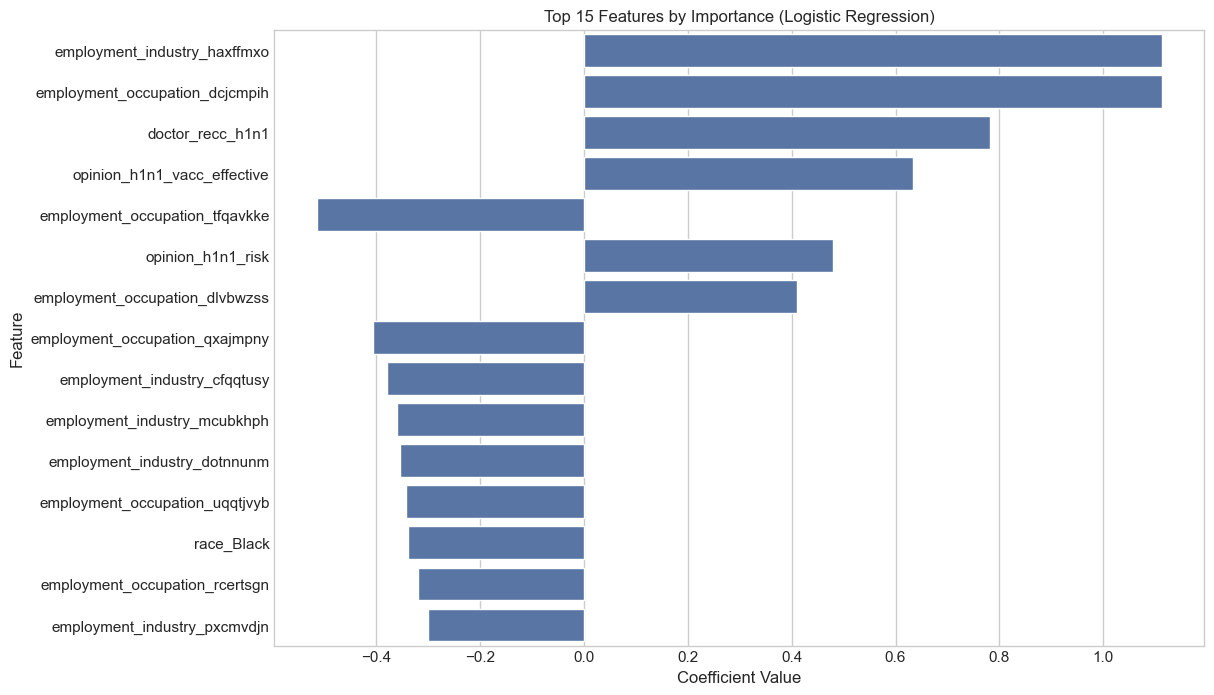

In [179]:

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_15_features = feature_importance.head(15)
sns.barplot(x='Coefficient', y='Feature', data=top_15_features)
plt.title('Top 15 Features by Importance (Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

### Improved Model: Tuned Logistic Regression


In [180]:
# Define hyperparameter grid for logistic regression
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']  # liblinear supports both L1 and L2 regularization
}

# Create grid search object
grid_search = GridSearchCV(
    baseline_model,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Print best parameters
print("\nBest parameters found:")
print(grid_search.best_params_)

# Get the best model
tuned_logistic_model = grid_search.best_estimator_

# Make predictions
y_train_pred_tuned = tuned_logistic_model.predict(X_train)
y_test_pred_tuned = tuned_logistic_model.predict(X_test)

# Get probabilities for ROC curve
y_train_proba_tuned = tuned_logistic_model.predict_proba(X_train)[:, 1]
y_test_proba_tuned = tuned_logistic_model.predict_proba(X_test)[:, 1]

# Evaluate the tuned model
print("\nTuned Logistic Regression Model Performance:")
print("\nTraining Data:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_tuned):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_train, y_train_proba_tuned):.4f}")
print("\nTesting Data:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_tuned):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_proba_tuned):.4f}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best parameters found:
{'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}

Tuned Logistic Regression Model Performance:

Training Data:
Accuracy: 0.8374
ROC-AUC: 0.8397

Testing Data:
Accuracy: 0.8375
ROC-AUC: 0.8287


In [181]:
# Display classification report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred_tuned))




Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4207
           1       0.68      0.44      0.54      1135

    accuracy                           0.84      5342
   macro avg       0.77      0.69      0.72      5342
weighted avg       0.82      0.84      0.82      5342



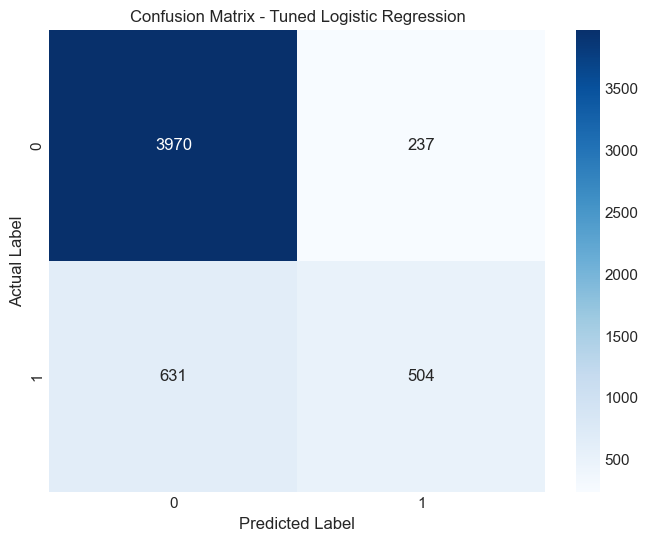

In [182]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm_tuned = confusion_matrix(y_test, y_test_pred_tuned)
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Tuned Logistic Regression')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

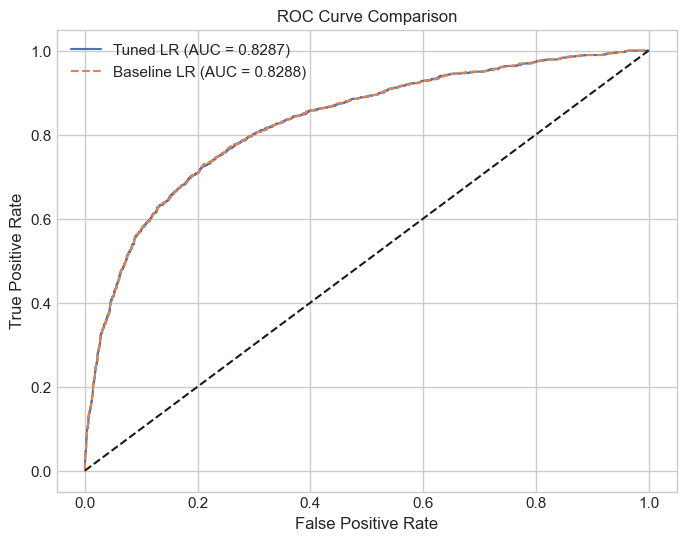

In [183]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_test_proba_tuned)
plt.plot(fpr_tuned, tpr_tuned, label=f'Tuned LR (AUC = {roc_auc_score(y_test, y_test_proba_tuned):.4f})')
plt.plot(fpr, tpr, label=f'Baseline LR (AUC = {roc_auc_score(y_test, y_test_proba):.4f})', linestyle='--')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

### Non-Parametric Model: Decision Tree


In [184]:
# Create a pipeline with preprocessing and decision tree
dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

# Get probabilities for ROC curve
y_train_proba_dt = dt_model.predict_proba(X_train)[:, 1]
y_test_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\nDecision Tree Model Performance:")
print("\nTraining Data:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_dt):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_train, y_train_proba_dt):.4f}")
print("\nTesting Data:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_dt):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_proba_dt):.4f}")




Decision Tree Model Performance:

Training Data:
Accuracy: 1.0000
ROC-AUC: 1.0000

Testing Data:
Accuracy: 0.7550
ROC-AUC: 0.6498


In [185]:
# Display classification report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred_dt))



Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      4207
           1       0.43      0.47      0.45      1135

    accuracy                           0.75      5342
   macro avg       0.64      0.65      0.65      5342
weighted avg       0.76      0.75      0.76      5342



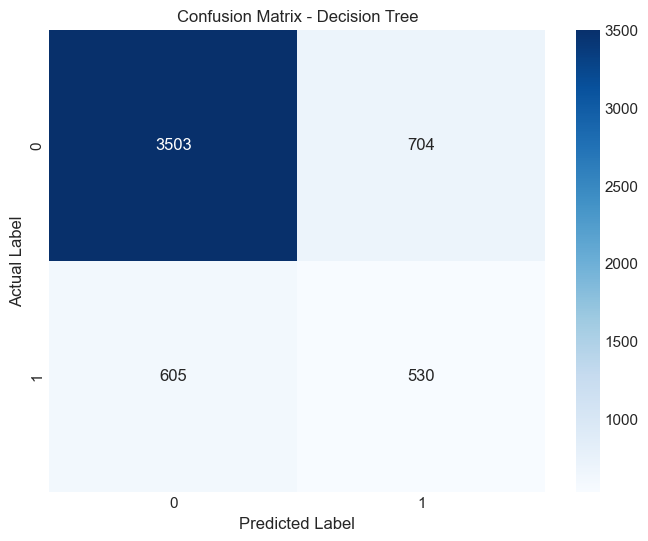

In [186]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm_dt = confusion_matrix(y_test, y_test_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

#### Tuned Decision Tree Model


In [187]:
# Define hyperparameter grid for decision tree
dt_param_grid = {
    'classifier__max_depth': [5, 10, 15, 20, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

# Create grid search object
dt_grid_search = GridSearchCV(
    dt_model,
    dt_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Fit grid search
dt_grid_search.fit(X_train, y_train)

# Print best parameters
print("\nBest parameters found for Decision Tree:")
print(dt_grid_search.best_params_)

# Get the best model
tuned_dt_model = dt_grid_search.best_estimator_

# Make predictions
y_train_pred_dt_tuned = tuned_dt_model.predict(X_train)
y_test_pred_dt_tuned = tuned_dt_model.predict(X_test)

# Get probabilities for ROC curve
y_train_proba_dt_tuned = tuned_dt_model.predict_proba(X_train)[:, 1]
y_test_proba_dt_tuned = tuned_dt_model.predict_proba(X_test)[:, 1]

# Evaluate the tuned model
print("\nTuned Decision Tree Model Performance:")
print("\nTraining Data:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_dt_tuned):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_train, y_train_proba_dt_tuned):.4f}")
print("\nTesting Data:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_dt_tuned):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_proba_dt_tuned):.4f}")

# Display classification report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred_dt_tuned))

Fitting 5 folds for each of 90 candidates, totalling 450 fits

Best parameters found for Decision Tree:
{'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}

Tuned Decision Tree Model Performance:

Training Data:
Accuracy: 0.8328
ROC-AUC: 0.8231

Testing Data:
Accuracy: 0.8282
ROC-AUC: 0.8090

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      4207
           1       0.64      0.43      0.52      1135

    accuracy                           0.83      5342
   macro avg       0.75      0.68      0.71      5342
weighted avg       0.81      0.83      0.82      5342



### Ensemble Model: Random Forest


In [188]:
# Create a pipeline with preprocessing and random forest
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Get probabilities for ROC curve
y_train_proba_rf = rf_model.predict_proba(X_train)[:, 1]
y_test_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\nRandom Forest Model Performance:")
print("\nTraining Data:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_rf):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_train, y_train_proba_rf):.4f}")
print("\nTesting Data:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_rf):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_proba_rf):.4f}")

# Display classification report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred_rf))




Random Forest Model Performance:

Training Data:
Accuracy: 1.0000
ROC-AUC: 1.0000

Testing Data:
Accuracy: 0.8328
ROC-AUC: 0.8183

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4207
           1       0.69      0.38      0.49      1135

    accuracy                           0.83      5342
   macro avg       0.77      0.67      0.70      5342
weighted avg       0.82      0.83      0.81      5342



In [189]:
# Plot feature importance
rf_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.named_steps['classifier'].feature_importances_
})

# Sort by importance
rf_feature_importance = rf_feature_importance.sort_values('Importance', ascending=False)

# Display top 15 most important features
print("\nTop 15 Most Important Features (Random Forest):")
print(rf_feature_importance.head(15))




Top 15 Most Important Features (Random Forest):
                        Feature  Importance
9              doctor_recc_h1n1    0.089114
16            opinion_h1n1_risk    0.064982
15  opinion_h1n1_vacc_effective    0.056147
19            opinion_seas_risk    0.043366
17  opinion_h1n1_sick_from_vacc    0.028036
0                  h1n1_concern    0.027402
18  opinion_seas_vacc_effective    0.026683
20  opinion_seas_sick_from_vacc    0.026174
10         doctor_recc_seasonal    0.021585
21             household_adults    0.021029
1                h1n1_knowledge    0.020463
22           household_children    0.018777
13                health_worker    0.017216
6   behavioral_large_gatherings    0.013826
11        chronic_med_condition    0.013765


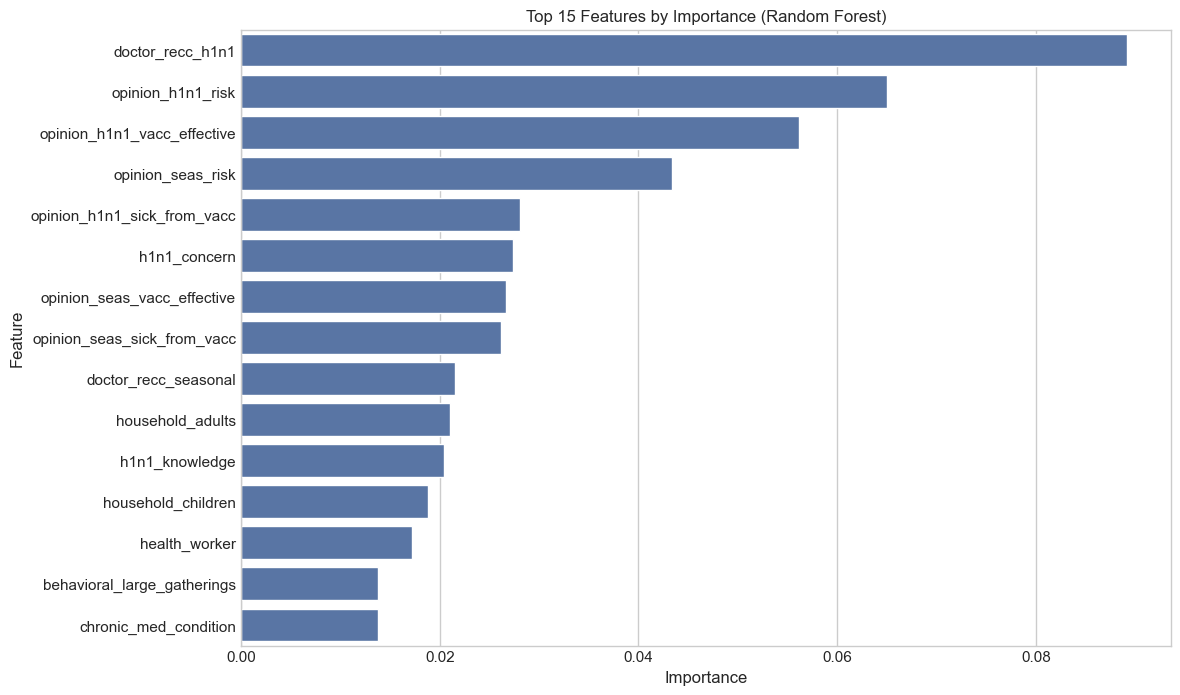

In [190]:
# Visualize feature importance
plt.figure(figsize=(12, 8))
top_15_rf_features = rf_feature_importance.head(15)
sns.barplot(x='Importance', y='Feature', data=top_15_rf_features)
plt.title('Top 15 Features by Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Model Evaluation and Comparison


In [191]:
# Create a comparison of all models
models = {
    'Baseline Logistic Regression': {
        'train_acc': accuracy_score(y_train, y_train_pred),
        'test_acc': accuracy_score(y_test, y_test_pred),
        'train_roc_auc': roc_auc_score(y_train, y_train_proba),
        'test_roc_auc': roc_auc_score(y_test, y_test_proba),
        'test_prec': precision_score(y_test, y_test_pred),
        'test_recall': recall_score(y_test, y_test_pred),
        'test_f1': f1_score(y_test, y_test_pred)
    },
    'Tuned Logistic Regression': {
        'train_acc': accuracy_score(y_train, y_train_pred_tuned),
        'test_acc': accuracy_score(y_test, y_test_pred_tuned),
        'train_roc_auc': roc_auc_score(y_train, y_train_proba_tuned),
        'test_roc_auc': roc_auc_score(y_test, y_test_proba_tuned),
        'test_prec': precision_score(y_test, y_test_pred_tuned),
        'test_recall': recall_score(y_test, y_test_pred_tuned),
        'test_f1': f1_score(y_test, y_test_pred_tuned)
    },
    'Decision Tree': {
        'train_acc': accuracy_score(y_train, y_train_pred_dt),
        'test_acc': accuracy_score(y_test, y_test_pred_dt),
        'train_roc_auc': roc_auc_score(y_train, y_train_proba_dt),
        'test_roc_auc': roc_auc_score(y_test, y_test_proba_dt),
        'test_prec': precision_score(y_test, y_test_pred_dt),
        'test_recall': recall_score(y_test, y_test_pred_dt),
        'test_f1': f1_score(y_test, y_test_pred_dt)
    },
    'Tuned Decision Tree': {
        'train_acc': accuracy_score(y_train, y_train_pred_dt_tuned),
        'test_acc': accuracy_score(y_test, y_test_pred_dt_tuned),
        'train_roc_auc': roc_auc_score(y_train, y_train_proba_dt_tuned),
        'test_roc_auc': roc_auc_score(y_test, y_test_proba_dt_tuned),
        'test_prec': precision_score(y_test, y_test_pred_dt_tuned),
        'test_recall': recall_score(y_test, y_test_pred_dt_tuned),
        'test_f1': f1_score(y_test, y_test_pred_dt_tuned)
    },
    'Random Forest': {
        'train_acc': accuracy_score(y_train, y_train_pred_rf),
        'test_acc': accuracy_score(y_test, y_test_pred_rf),
        'train_roc_auc': roc_auc_score(y_train, y_train_proba_rf),
        'test_roc_auc': roc_auc_score(y_test, y_test_proba_rf),
        'test_prec': precision_score(y_test, y_test_pred_rf),
        'test_recall': recall_score(y_test, y_test_pred_rf),
        'test_f1': f1_score(y_test, y_test_pred_rf)
    }
}

# Convert to DataFrame for easy comparison
model_comparison = pd.DataFrame(models).T
model_comparison = model_comparison[['train_acc', 'test_acc', 'train_roc_auc', 'test_roc_auc', 'test_prec', 'test_recall', 'test_f1']]
model_comparison.columns = ['Train Accuracy', 'Test Accuracy', 'Train ROC-AUC', 'Test ROC-AUC', 'Test Precision', 'Test Recall', 'Test F1']

# Format the dataframe to display percentages with 2 decimal places
model_comparison_pct = model_comparison.applymap(lambda x: f"{x:.2%}")

# Print the formatted comparison table
print("\nModel Comparison:")
print(model_comparison_pct)




Model Comparison:
                             Train Accuracy Test Accuracy Train ROC-AUC  \
Baseline Logistic Regression         83.75%        83.68%        83.97%   
Tuned Logistic Regression            83.74%        83.75%        83.97%   
Decision Tree                       100.00%        75.50%       100.00%   
Tuned Decision Tree                  83.28%        82.82%        82.31%   
Random Forest                       100.00%        83.28%       100.00%   

                             Test ROC-AUC Test Precision Test Recall Test F1  
Baseline Logistic Regression       82.88%         67.75%      44.23%  53.52%  
Tuned Logistic Regression          82.87%         68.02%      44.41%  53.73%  
Decision Tree                      64.98%         42.95%      46.70%  44.74%  
Tuned Decision Tree                80.90%         64.18%      43.26%  51.68%  
Random Forest                      81.83%         69.21%      38.41%  49.41%  


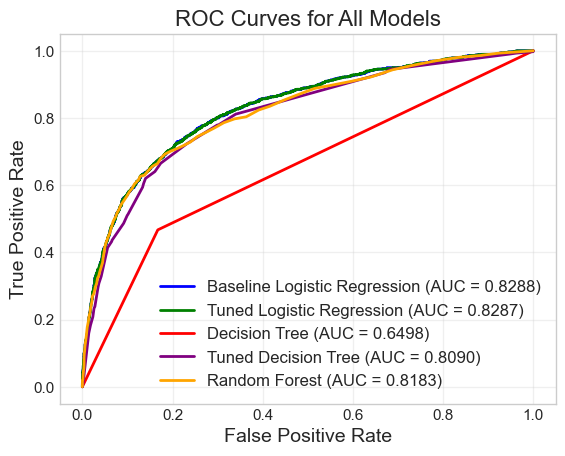

In [192]:
# Define colors for each model
colors = ['blue', 'green', 'red', 'purple', 'orange']
models_data = [
    ('Baseline Logistic Regression', y_test_proba, colors[0]),
    ('Tuned Logistic Regression', y_test_proba_tuned, colors[1]),
    ('Decision Tree', y_test_proba_dt, colors[2]),
    ('Tuned Decision Tree', y_test_proba_dt_tuned, colors[3]),
    ('Random Forest', y_test_proba_rf, colors[4])
]

# Plot each model's ROC curve
for i, (model_name, y_score, color) in enumerate(models_data):
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc_score = roc_auc_score(y_test, y_score)
    plt.plot(fpr, tpr, color=color, lw=2, 
             label=f'{model_name} (AUC = {auc_score:.4f})')

# Add labels and title
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves for All Models', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, alpha=0.3)

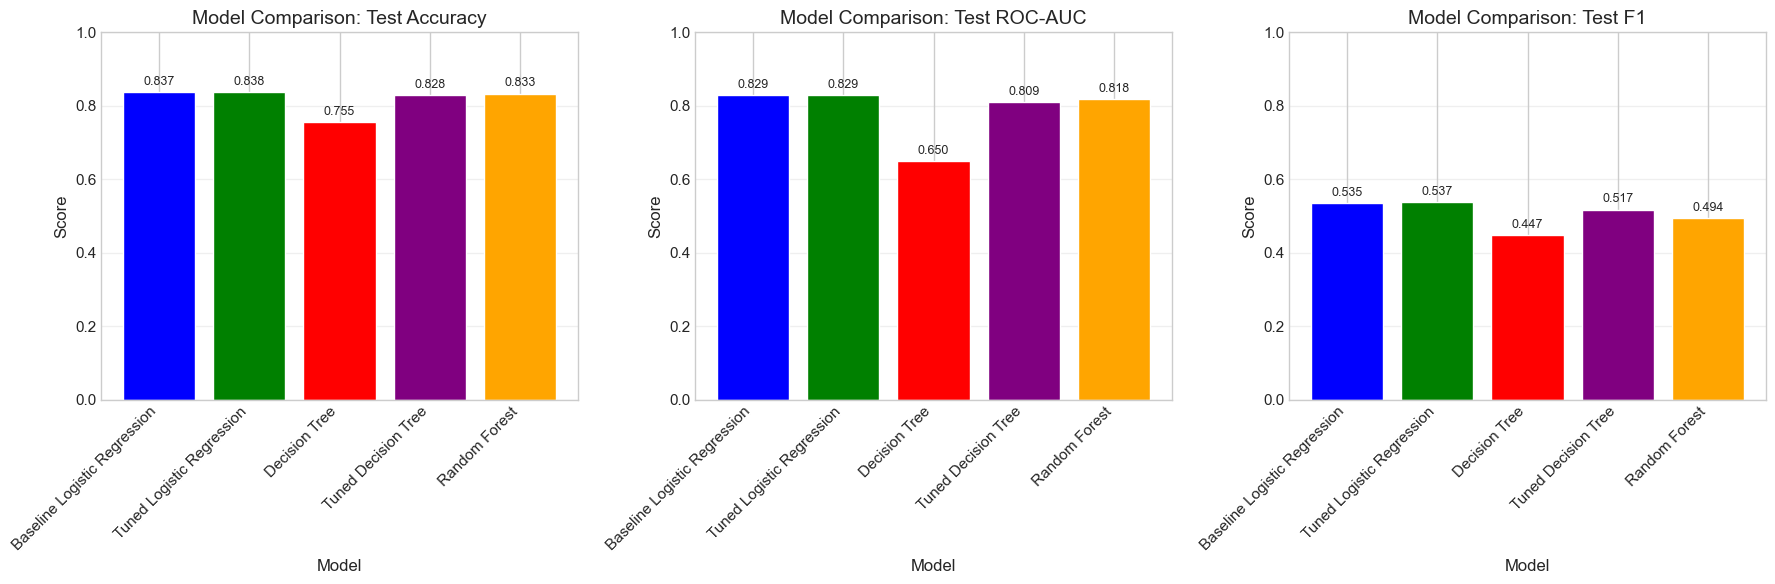

In [199]:
# Create a bar chart for key metrics
metrics_to_plot = ['Test Accuracy', 'Test ROC-AUC', 'Test F1']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

model_names = list(models.keys())
colors = ['blue', 'green', 'red', 'purple', 'orange']

for i, metric in enumerate(metrics_to_plot):
    axes[i].bar(model_names, model_comparison[metric], color=colors)
    axes[i].set_title(f'Model Comparison: {metric}', fontsize=14)
    axes[i].set_ylim(0, 1)
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel('Score')
    axes[i].grid(axis='y', alpha=0.3)
    # Rotate x-axis labels for better readability
    plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')
    
    # Add value labels on top of each bar
    for j, v in enumerate(model_comparison[metric]):
        axes[i].text(j, v + 0.02, f'{v:.3f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()



In [194]:
# Calculate and display the overfitting gap
model_comparison['Overfitting Gap'] = model_comparison['Train Accuracy'] - model_comparison['Test Accuracy']
print("\nOverfitting Analysis (Train Accuracy - Test Accuracy):")
print(model_comparison[['Train Accuracy', 'Test Accuracy', 'Overfitting Gap']])

# Sort models by the test ROC-AUC score (often considered the best overall metric)
print("\nModels Ranked by Test ROC-AUC:")
ranked_models = model_comparison.sort_values(by='Test ROC-AUC', ascending=False)
print(ranked_models[['Test ROC-AUC', 'Test Accuracy', 'Test F1']])




Overfitting Analysis (Train Accuracy - Test Accuracy):
                              Train Accuracy  Test Accuracy  Overfitting Gap
Baseline Logistic Regression        0.837491       0.836765         0.000726
Tuned Logistic Regression           0.837444       0.837514        -0.000070
Decision Tree                       1.000000       0.754961         0.245039
Tuned Decision Tree                 0.832764       0.828154         0.004610
Random Forest                       1.000000       0.832834         0.167166

Models Ranked by Test ROC-AUC:
                              Test ROC-AUC  Test Accuracy   Test F1
Baseline Logistic Regression      0.828793       0.836765  0.535181
Tuned Logistic Regression         0.828696       0.837514  0.537313
Random Forest                     0.818317       0.832834  0.494051
Tuned Decision Tree               0.809046       0.828154  0.516842
Decision Tree                     0.649810       0.754961  0.447446


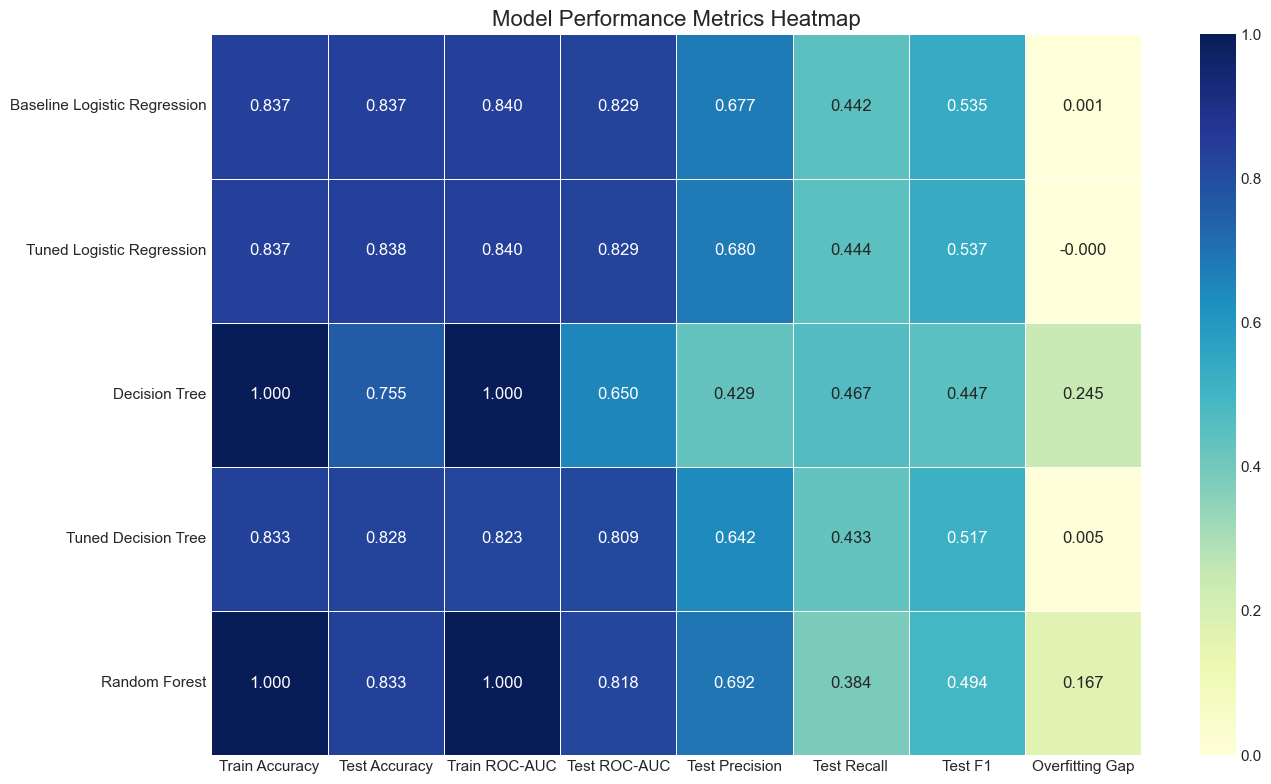

In [198]:
# Create a heatmap of all metrics for visual comparison
plt.figure(figsize=(14, 8))

# Use the original dataframe for the heatmap
sns.heatmap(model_comparison, annot=True, cmap='YlGnBu', fmt='.3f', linewidths=.5)
plt.title('Model Performance Metrics Heatmap', fontsize=16)
plt.tight_layout()
plt.show()



In [196]:
# Identify the best model based on different criteria
best_model = {
    'Accuracy': model_comparison['Test Accuracy'].idxmax(),
    'ROC-AUC': model_comparison['Test ROC-AUC'].idxmax(),
    'F1 Score': model_comparison['Test F1'].idxmax(),
    'Lowest Overfitting': model_comparison['Overfitting Gap'].abs().idxmin()
}

print("\nBest Model by Metric:")
for metric, model in best_model.items():
    print(f"- {metric}: {model}")

# Summary analysis
print("\nSummary Analysis:")
best_overall = model_comparison['Test ROC-AUC'].idxmax()
print(f"The best overall model appears to be {best_overall} based on ROC-AUC score.")


Best Model by Metric:
- Accuracy: Tuned Logistic Regression
- ROC-AUC: Baseline Logistic Regression
- F1 Score: Tuned Logistic Regression
- Lowest Overfitting: Tuned Logistic Regression

Summary Analysis:
The best overall model appears to be Baseline Logistic Regression based on ROC-AUC score.
